## Structure

#### Parametric Methods
* Linear Regression
* Bayesian Linear Regression

#### Nonparametric Methods
* Interpolation
* Gaussian Processes

#### Bonus
* From BLR to GPs

In [1954]:
import LinearRegression as LR
import BayesianLinearRegression as BLR
import Interpolation as interp
import GaussianProcessRegression as GP
import matplotlib.pyplot as plt

In [1955]:
import imp

## Non Parametric Models
* Models which the number of parameters are fixed (complexity is fixed)
    * Linear Regresson
    * Bayesian Linear Regression

## Linear Regression
* Build a model with a set number of parameters, i.e. parametric
* Example, simple polynomial model

$f(x) = \sum_{i=0}^d w_i x^i$

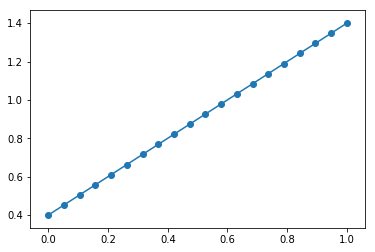

In [1959]:
import class_demos
imp.reload(class_demos)
imp.reload(LR)

## Load Function
f1=class_demos.linearmodel()

## Evaluate linear model
N=20
xtrain=np.linspace(0,1,N)
ytrain=f1(xtrain)

## Build Linear Regression Model
d=1
LRmodel=LR.regress() #Load Model
LRmodel.polybasis(d=1) #set n, the degree of the polynomial, in this case we have a linear model

## Clean Data
LRmodel.traindata(xtrain,ytrain)
LRmodel.trainmodel()
LRmodel.model
LRmodel.plot()

In [1960]:
np.sum((LRmodel.eval(xtrain)-f1(xtrain))**2)/len(xtrain)
LRmodel.model

array([[ 0.4],
       [ 1. ]])

#### Noisy Data
Now imagine the case in which our data is not perfect, i.e., there is some uncertainty due to experimental setup/simulation mesh etc. We can describe observations as realizations from an analytical model with added noise

$y_i = f(x_i) + \epsilon_i$

$f(x)= \sum_i^d w_i \phi_i(x)$

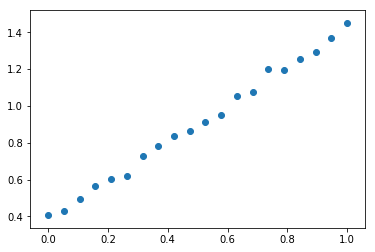

In [1964]:
plt.close("all")
## Generate Noisy Data for a linear model
# sigma is the variance, describing how noisy the data is
N=20
sigma=0.001
f2=class_demos.noisylinearmodel(sigma=sigma)
xtrain=np.linspace(0,1,N)
ytrain=f2(xtrain)

## Plot Figure
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xtrain,ytrain)
plt.show(fig)

In [1965]:
plt.close("all")
## Build a linear model
LRmodeln=LR.regress() #load model
LRmodeln.polybasis(1) #set degree of polynomial
LRmodeln.traindata(xtrain,ytrain)
LRmodeln.trainmodel()
LRmodeln.model


array([[ 0.38510448],
       [ 1.0380807 ]])

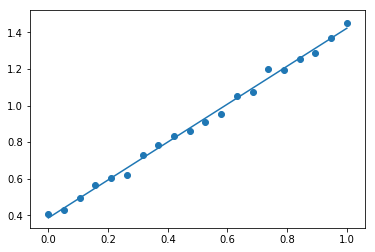

In [1966]:
LRmodeln.plot()

In [1967]:
np.sum((LRmodel.eval(xtrain)-f2(xtrain))**2)/len(xtrain)

0.0012263698405133763

## Bayesian Linear Regression
* Observations are realizations of an analytical model with added noise

$y_i = f(x_i) + \epsilon_i$

$f(x)= \sum_j^d w_j x^j$

* Note, for ease, n=1, for a linear model, can increase degree or use different basis functions
* The realizations from the model are i.i.d. :
    Independent and Identically Distributed, like flipping a coin!

$\epsilon_i \sim N(0,\beta^{-1})$
    
* This naturally gives rise to the likelihood of the  given training data, with a "known" analytical model

$p(\pmb{y}|\pmb{X},\pmb{w},\beta)$

* By introducing a prior over the weights of the analytical model we can apply bayes theorem than cast the problem as obtaining the posterior distribution of the model weights given the data, and the distributions for the respective likelihood and prior

$\pmb{Posterior}= \frac{\pmb{Likelihood} * \pmb{Prior}}
{\pmb{Marginal Distribution}}$

Prior:
$p(\pmb{w}|\alpha) \sim N(0,\alpha^{-1}\pmb{I})$

Posterior:
$p(\pmb{w}|\pmb{y},\pmb{X},\beta,\alpha)= \frac{p(\pmb{y}|\pmb{X},\pmb{w},\beta)p(\pmb{w}|\alpha)}
{p(\pmb{y}|\alpha,\beta)}$

Marginal Distribution:
$p(\pmb{y}|\alpha,\beta) = \int p(\pmb{y}|\pmb{X},\pmb{w},\beta)p(\pmb{w}|\alpha) d\pmb{w}$
 

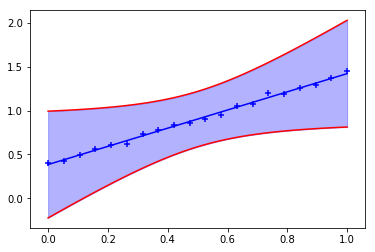

In [1979]:
plt.close("all")
## Fitting with BLR
imp.reload(BLR)
BLmodel=BLR.bayesregress() #load model

## Build model
d=1
alpha=0.001
beta=2

## Choose model type
BLmodel.polybasis(d=d) #choose basis, and degree
BLmodel.traindata(xtrain,ytrain)

## Set Hyper parameters and train
BLmodel.sethyper(alpha=alpha,beta=beta)
BLmodel.trainmodel()
BLmodel.plot()

In [1988]:
BLmodel.model

array([[ 0.38525393],
       [ 1.03775442]])

#### Empirical Bayes Estimate
* Notice we introduce two parameters into the mix, $\alpha$ which describes the distribution of the prior, and $\beta$ which describes the distribution of the likelihood
* By marginalizing over the weights in the posterior distribution we can obtain the marginal distribution of the data given the hyper parameters
* This marginal distribution is than used to in conjunction with bayes theorem observing the likelihood of the parameters given the data

$p(\alpha,\beta|\pmb{y}) \propto p(\pmb{y}|\alpha,\beta)p(\alpha,\beta)$

* Ultimately the goal becomes maximizing the likelihood of the data given the parameters (given by the marginalization of the posterior over the weights). 
* Due to conjugate distributions analytical forms of marginalization can be found, and the parameters can than be estimated using bayes theorem

In [1990]:
plt.close("all")
for i in range(6): BLmodel.optimize()
BLmodel.model

array([[ 0.38525393],
       [ 1.03775441]])

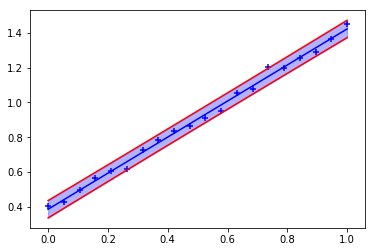

In [1991]:
fhat,var=BLmodel.eval(BLmodel.xtrain)
BLmodel.plot()

In [1992]:
print(BLmodel.alpha)
print(BLmodel.beta)

[[ 1.35169119]]
1900.54471798


#### Connections
* BLR can also be thought of as a form of regularization, (L1 L2 regulatization for e.g.) which conditions the model weights based off of the choosing of the $\alpha$ and $\beta$ hyperparameters, we can see this when we raise the polynomial degree and try to fit higher order models to the noisy linear model

## Non parametric models
* Models which the number of parameters grow as the amount of data increases (complexity grows)    
    * Interpolation
    * Gaussian Processes

## Interpolation
* Extension of generalized least squares regression requiring that the fitted line passes through the data point
* e.g. Lagrange Polynomials; formulated by solving coefficients from general least squares using set of equations equating to training points, therefore need n+1 points to fit a n-th degree polynomial

$f(x)= \sum_{i=0}^{n} y_ic_{i}$

$c_{i}= {\displaystyle \prod_{0\leq j \leq n, i \neq j}} \frac{x-x_i}{xi-xj}$

In [2038]:
plt.close("all")
import class_demos
imp.reload(interp)
n=6
xtrain=np.linspace(0,1,n)
f=class_demos.testfuncinterp()
ytrain=f(xtrain)

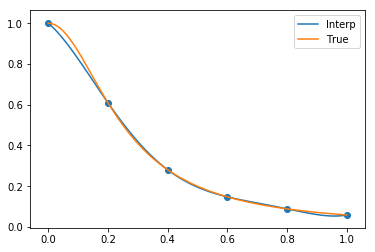

In [2039]:
plt.close("all")
INTmodel=interp.interp()
INTmodel.traindata(xtrain,ytrain)
INTmodel.polybasis()
INTmodel.interp()
INTmodel.ftrue=f
INTmodel.plottrue()

### Comparison To other methods
* If we use a radial basis function centered about every single data point as our basis functions for interpolation, we have a natural extension to think of the GP framework

* This can be thought of as kernel regression using radial basis functions. Although, without the statistical framework methods such as cross validation must be used to estimate the hyperparameters (this will not be done here). Also, without the statistical framework we loose the natural interpretation of uncertainty.

Radial Basis Function:
$k(x,x_i)=exp\frac{(x-x_i)^2}{l}$

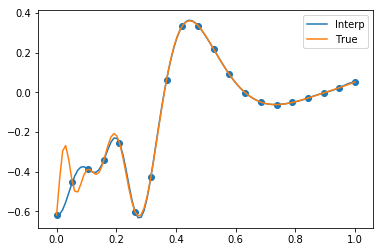

In [2073]:
plt.close("all")
import class_demos
imp.reload(interp)
f=class_demos.testfuncgp()

## Specify number of points sampled
n=20    #20 works well
l=0.005 #0.005 works well

## Generate Training data
xtrain=np.linspace(0,1,n)
ytrain=f(xtrain)

## Specify Model, set hyperparameters
INTmodel=interp.interp()
INTmodel.traindata(xtrain,ytrain)
INTmodel.rbfbasis(l=l)
#INTmodel.polybasis()  #we can try this with polynomials as well to see how they do

## Plot model
INTmodel.interp()
INTmodel.ftrue=f
INTmodel.plottrue()

## Gaussian Processes
* Non parametric model based on a similarity function
* GPs provides us a tool for nonlinear interpolation which gives us confidence bounds 
* GPs also give us an expression in which we shift our focus to the optimization of hyperparameters

$\hat{f} (x)=\mu + k(x,x_i){K_{ij}}^{-1}(y_j-\mu)$

$k(x,x_i)=exp\frac{(x-x_i)^2}{l}$

$K_{ij}=k(x_i,x_j)=exp\frac{(x_i-x_j)^2}{l}$

$i$,$j$ enumerate the available training data

In [2067]:
plt.close("all")
import class_demos
imp.reload(GP)

## Specify the number of points sampled
n=7    #start with 7
l=0.3  #start with 0.3

## Generate data
f=class_demos.testfuncgp() #same function from above
xtrain=np.linspace(0,1,n)
ytrain=f(xtrain)

## Specify model
GPmodel=GP.gpprocess()
GPmodel.traindata(xtrain,ytrain)
GPmodel.rbfbasis(l=l) #set length scale parameter and set similarity function
GPmodel.mu=0 #simplify the problem
GPmodel.trainGP()

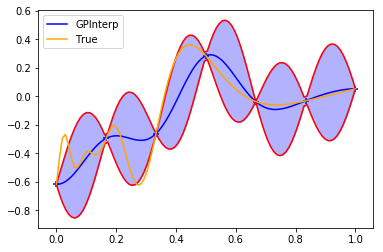

In [2071]:
# Plot true function values versus predictions from GP
GPmodel.ftrue=f
GPmodel.plottrue()

### Hyperparameter optimization
* By casting the problem stochasically, a process followed similar from BLR allows us to formulate an expression of the likelihood of the hyperparameters for the given data. We continue to maximize these parameters

Optimization terminated successfully.
         Current function value: -17.568312
         Iterations: 5
         Function evaluations: 10
Updating Hyperparameters
Training GP


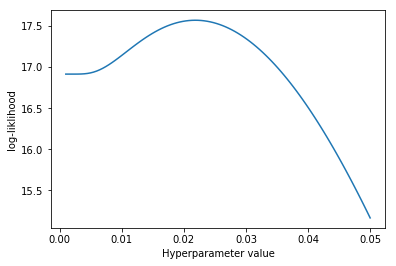

Optimal Solution for hyperparameter l is 0.0219


In [2070]:
plt.close("all")
# Maximize the logliklihood with respect the hyperparameter,l
GPmodel.optimize()
print('Optimal Solution for hyperparameter l is %.4f' % GPmodel.l)

In [2034]:
GPmodel.l #check for update

0.02185546874999923

* Note: we axtually minimize the negative logliklihood for simplicity of algo implementation, this is why function value is negative